In [2]:
import pandas as pd

# Load the dataset
file_path = 'defects_data_1.csv'  # Update this path with your actual file path
df = pd.read_csv(file_path)
df.head()


,defect_id,product_id,defect_type,defect_date,defect_location,severity,inspection_method,repair_cost
0,1,15.0,Structural,06-06-2024,Component,Minor,Visual Inspection,245.47
1,2,6.0,Functional,4/26/2024,Component,Minor,Visual Inspection,26.87
2,3,84.0,Structural,2/15/2024,Internal,Minor,Automated Testing,835.81
3,4,10.0,Functional,3/28/2024,Internal,Critical,Automated Testing,444.47
4,5,14.0,Cosmetic,4/26/2024,Component,Minor,Manual Testing,823.64


In [3]:
# Step 1: Check for missing values
missing_values = df.isnull().sum()
print("Missing values before imputation:\n", missing_values)


Missing values before imputation:
 defect_id            0
product_id           3
defect_type          5
defect_date          0
defect_location      1
severity             0
inspection_method    0
repair_cost          0
dtype: int64


In [4]:
# Step 2: Impute missing values
# Impute 'product_id' with the median
product_id_median = df['product_id'].median()
df['product_id'].fillna(product_id_median, inplace=True)

# Impute 'defect_type' with the mode
defect_type_mode = df['defect_type'].mode()[0]
df['defect_type'].fillna(defect_type_mode, inplace=True)

# Impute 'defect_location' with the mode
defect_location_mode = df['defect_location'].mode()[0]
df['defect_location'].fillna(defect_location_mode, inplace=True)

# Verify that there are no missing values left
missing_values_after_imputation = df.isnull().sum()
print("Missing values after imputation:\n", missing_values_after_imputation)

Missing values after imputation:
 defect_id            0
product_id           0
defect_type          0
defect_date          0
defect_location      0
severity             0
inspection_method    0
repair_cost          0
dtype: int64


In [5]:
# Step 3: Convert 'defect_date' to datetime format, handling different date formats
from datetime import datetime
def parse_date(date_str):
    for fmt in ("%m-%d-%Y", "%m/%d/%Y"):
        try:
            return datetime.strptime(date_str, fmt)
        except ValueError:
            continue
    return pd.NaT

df['defect_date'] = df['defect_date'].apply(parse_date)

# Verify the conversion
print(df['defect_date'].head())
print("Data type of 'defect_date':", df['defect_date'].dtypes)

0   2024-06-06
1   2024-04-26
2   2024-02-15
3   2024-03-28
4   2024-04-26
Name: defect_date, dtype: datetime64[ns]
Data type of 'defect_date': datetime64[ns]


In [6]:
# Select only numerical columns for correlation calculation
numerical_columns = df.select_dtypes(include=['float64', 'int64']).columns
correlation_matrix = df[numerical_columns].corr()
repair_cost_correlation = correlation_matrix['repair_cost'].sort_values(ascending=False)
print(repair_cost_correlation)


repair_cost    1.000000
defect_id      0.013103
product_id     0.003901
Name: repair_cost, dtype: float64


In [7]:
# One-hot encode categorical variables
df_encoded = pd.get_dummies(df, columns=['defect_type', 'defect_location', 'severity', 'inspection_method'], drop_first=True)

# Verify the first few rows of the encoded dataframe
print(df_encoded.head())


   defect_id  product_id defect_date  repair_cost  defect_type_Functional  \
0          1        15.0  2024-06-06       245.47                   False   
1          2         6.0  2024-04-26        26.87                    True   
2          3        84.0  2024-02-15       835.81                   False   
3          4        10.0  2024-03-28       444.47                    True   
4          5        14.0  2024-04-26       823.64                   False   

   defect_type_Structural  defect_location_Internal  defect_location_Surface  \
0                    True                     False                    False   
1                   False                     False                    False   
2                    True                      True                    False   
3                   False                      True                    False   
4                   False                     False                    False   

   severity_Minor  severity_Moderate  inspection_method_

In [8]:
import pandas as pd

# Load the dataset
file_path = 'defects_data_1.csv'  # Update this path with your actual file path
df = pd.read_csv(file_path)

# Check for missing values
missing_values = df.isnull().sum()
print("Missing values before imputation:\n", missing_values)


Missing values before imputation:
 defect_id            0
product_id           3
defect_type          5
defect_date          0
defect_location      1
severity             0
inspection_method    0
repair_cost          0
dtype: int64


In [9]:
# Impute 'product_id' with the median
product_id_median = df['product_id'].median()
df['product_id'].fillna(product_id_median, inplace=True)

# Impute 'defect_type' with the mode
defect_type_mode = df['defect_type'].mode()[0]
df['defect_type'].fillna(defect_type_mode, inplace=True)

# Impute 'defect_location' with the mode
defect_location_mode = df['defect_location'].mode()[0]
df['defect_location'].fillna(defect_location_mode, inplace=True)

# Verify that there are no missing values left
missing_values_after_imputation = df.isnull().sum()
print("Missing values after imputation:\n", missing_values_after_imputation)


Missing values after imputation:
 defect_id            0
product_id           0
defect_type          0
defect_date          0
defect_location      0
severity             0
inspection_method    0
repair_cost          0
dtype: int64


In [10]:
from datetime import datetime

# Function to parse date strings into datetime
def parse_date(date_str):
    for fmt in ("%m-%d-%Y", "%m/%d/%Y"):
        try:
            return datetime.strptime(date_str, fmt)
        except ValueError:
            continue
    return pd.NaT

# Apply the function to the 'defect_date' column
df['defect_date'] = df['defect_date'].apply(parse_date)

# Verify the conversion
print(df['defect_date'].head())
print("Data type of 'defect_date':", df['defect_date'].dtypes)


0   2024-06-06
1   2024-04-26
2   2024-02-15
3   2024-03-28
4   2024-04-26
Name: defect_date, dtype: datetime64[ns]
Data type of 'defect_date': datetime64[ns]


In [11]:
# One-hot encode categorical variables
df_encoded = pd.get_dummies(df, columns=['defect_type', 'defect_location', 'severity', 'inspection_method'], drop_first=True)

# Verify the first few rows of the encoded dataframe
print(df_encoded.head())


   defect_id  product_id defect_date  repair_cost  defect_type_Functional  \
0          1        15.0  2024-06-06       245.47                   False   
1          2         6.0  2024-04-26        26.87                    True   
2          3        84.0  2024-02-15       835.81                   False   
3          4        10.0  2024-03-28       444.47                    True   
4          5        14.0  2024-04-26       823.64                   False   

   defect_type_Structural  defect_location_Internal  defect_location_Surface  \
0                    True                     False                    False   
1                   False                     False                    False   
2                    True                      True                    False   
3                   False                      True                    False   
4                   False                     False                    False   

   severity_Minor  severity_Moderate  inspection_method_

In [12]:
# Calculate the correlation matrix
correlation_matrix = df_encoded.corr()

# Extract the correlations with 'repair_cost'
repair_cost_correlation = correlation_matrix['repair_cost'].sort_values(ascending=False)
print("Correlation with 'repair_cost':\n", repair_cost_correlation)


Correlation with 'repair_cost':
 repair_cost                            1.000000
inspection_method_Manual Testing       0.046968
severity_Minor                         0.017556
defect_id                              0.013103
product_id                             0.003901
defect_type_Functional                 0.001606
defect_location_Internal              -0.007555
defect_date                           -0.010216
severity_Moderate                     -0.013844
defect_type_Structural                -0.019033
inspection_method_Visual Inspection   -0.034482
defect_location_Surface               -0.049645
Name: repair_cost, dtype: float64


In [13]:
from sklearn.preprocessing import PolynomialFeatures

# Define the features to include (excluding non-predictive columns)
features = df_encoded.drop(columns=['defect_id', 'defect_date', 'repair_cost'])
target = df_encoded['repair_cost']

# Initialize PolynomialFeatures with degree 2 (interaction terms and polynomial features)
poly = PolynomialFeatures(degree=2, include_bias=False)

# Fit and transform the features
features_poly = poly.fit_transform(features)

# Create a DataFrame for the polynomial features
features_poly_df = pd.DataFrame(features_poly, columns=poly.get_feature_names_out(features.columns))

# Combine polynomial features with the target
df_poly = pd.concat([features_poly_df, target], axis=1)

print(df_poly.head())


   product_id  defect_type_Functional  defect_type_Structural  \
0        15.0                     0.0                     1.0   
1         6.0                     1.0                     0.0   
2        84.0                     0.0                     1.0   
3        10.0                     1.0                     0.0   
4        14.0                     0.0                     0.0   

   defect_location_Internal  defect_location_Surface  severity_Minor  \
0                       0.0                      0.0             1.0   
1                       0.0                      0.0             1.0   
2                       1.0                      0.0             1.0   
3                       1.0                      0.0             0.0   
4                       0.0                      0.0             1.0   

   severity_Moderate  inspection_method_Manual Testing  \
0                0.0                               0.0   
1                0.0                               0.0   
2 

In [14]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score

# Prepare the features and target variable
X_poly = df_poly.drop(columns=['repair_cost'])
y = df_poly['repair_cost']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_poly, y, test_size=0.2, random_state=42)

# Initialize and train the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict on the test set
y_pred = model.predict(X_test)

# Calculate Mean Squared Error
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

# Apply cross-validation
cv_scores = cross_val_score(model, X_poly, y, cv=5)
print("Cross-Validation Scores:", cv_scores)
print("Mean Cross-Validation Score:", cv_scores.mean())


Mean Squared Error: 87860.91303350875
Cross-Validation Scores: [-0.13137269 -0.03815777 -0.1404272  -0.08878932  0.01801266]
Mean Cross-Validation Score: -0.07614686394634274


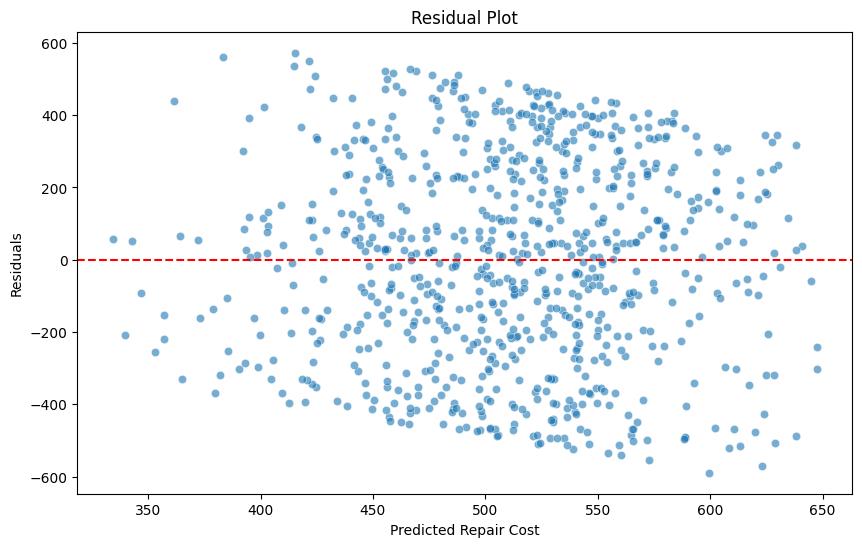

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

# Predict on the training set
y_train_pred = model.predict(X_train)

# Calculate residuals
residuals = y_train - y_train_pred

# Plot residuals
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_train_pred, y=residuals, alpha=0.6)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Predicted Repair Cost')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.show()


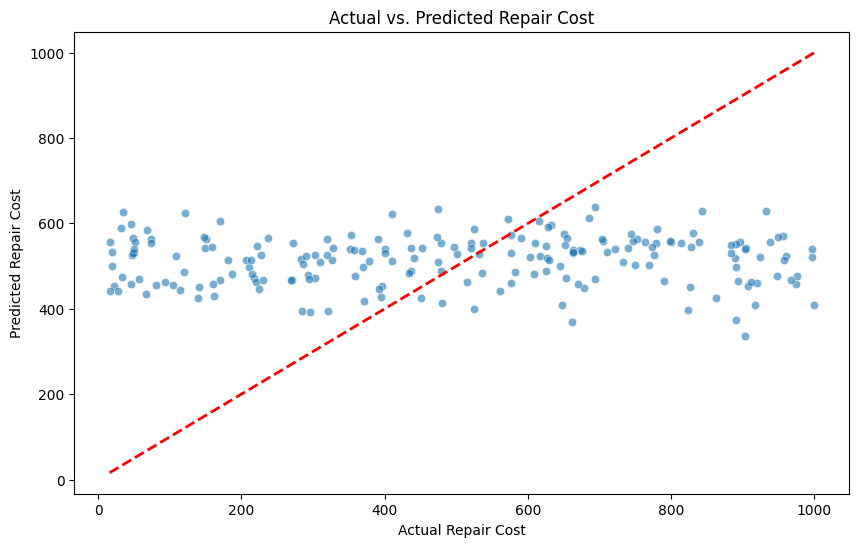

In [16]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.6, edgecolors='w', linewidth=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('Actual Repair Cost')
plt.ylabel('Predicted Repair Cost')
plt.title('Actual vs. Predicted Repair Cost')
plt.show()


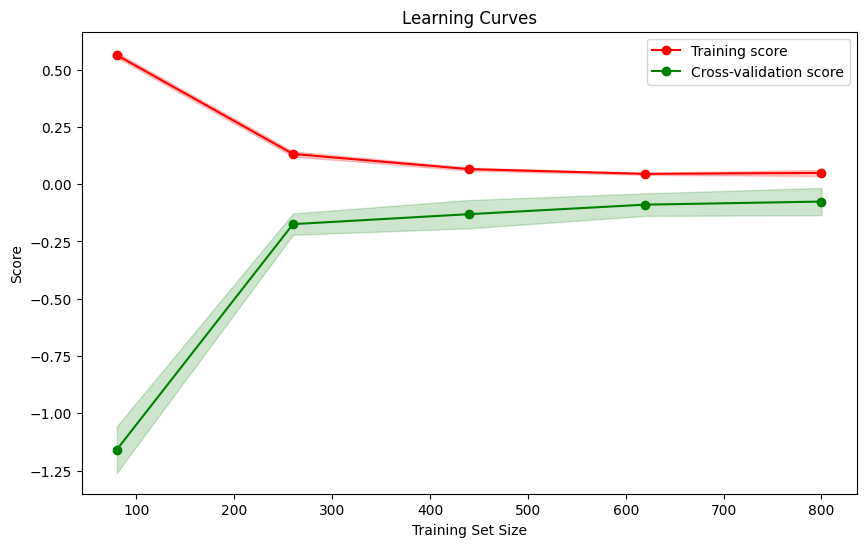

In [17]:
from sklearn.model_selection import learning_curve

# Get training and test scores
train_sizes, train_scores, test_scores = learning_curve(model, X_poly, y, cv=5, n_jobs=-1)

# Calculate the mean and standard deviation of the training and test scores
train_scores_mean = train_scores.mean(axis=1)
test_scores_mean = test_scores.mean(axis=1)
train_scores_std = train_scores.std(axis=1)
test_scores_std = test_scores.std(axis=1)

# Plot learning curves
plt.figure(figsize=(10, 6))
plt.plot(train_sizes, train_scores_mean, 'o-', color='r', label='Training score')
plt.plot(train_sizes, test_scores_mean, 'o-', color='g', label='Cross-validation score')

# Plot the filling between the lines for the standard deviation
plt.fill_between(train_sizes, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, alpha=0.2, color='r')
plt.fill_between(train_sizes, test_scores_mean - test_scores_std, test_scores_mean + test_scores_std, alpha=0.2, color='g')

plt.xlabel('Training Set Size')
plt.ylabel('Score')
plt.title('Learning Curves')
plt.legend(loc='best')
plt.show()


Mean Squared Error (Random Forest): 100620.6536267196


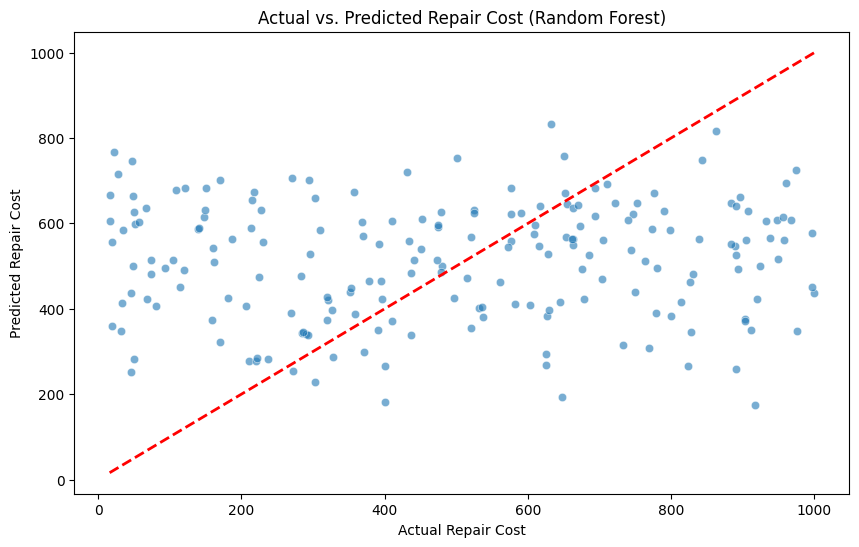

In [18]:
from sklearn.ensemble import RandomForestRegressor

# Initialize and train the Random Forest model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Predict on the test set
y_rf_pred = rf_model.predict(X_test)

# Calculate Mean Squared Error for Random Forest
mse_rf = mean_squared_error(y_test, y_rf_pred)
print("Mean Squared Error (Random Forest):", mse_rf)

# Plot Actual vs. Predicted for Random Forest
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_rf_pred, alpha=0.6, edgecolors='w', linewidth=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('Actual Repair Cost')
plt.ylabel('Predicted Repair Cost')
plt.title('Actual vs. Predicted Repair Cost (Random Forest)')
plt.show()


Mean Squared Error (Linear Regression): 87860.91303350875
Mean Squared Error (Random Forest): 100620.6536267196

Linear Regression Predictions:
      Actual  Predicted_LR
521   74.36    562.392274
737  895.96    557.017957
740  409.99    620.792702
660  436.90    487.652977
411   66.98    434.044239

Random Forest Predictions:
      Actual  Predicted_RF
521   74.36    482.544000
737  895.96    661.493900
740  409.99    370.268067
660  436.90    337.445733
411   66.98    635.993500


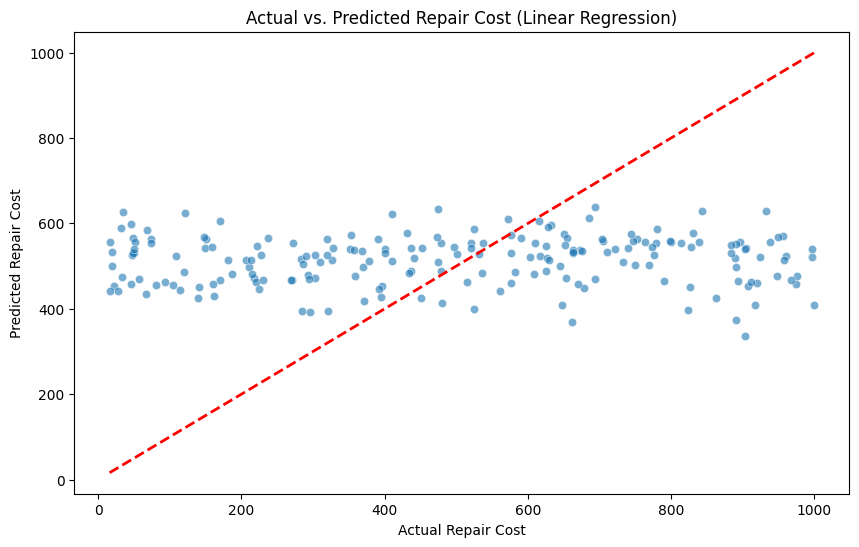

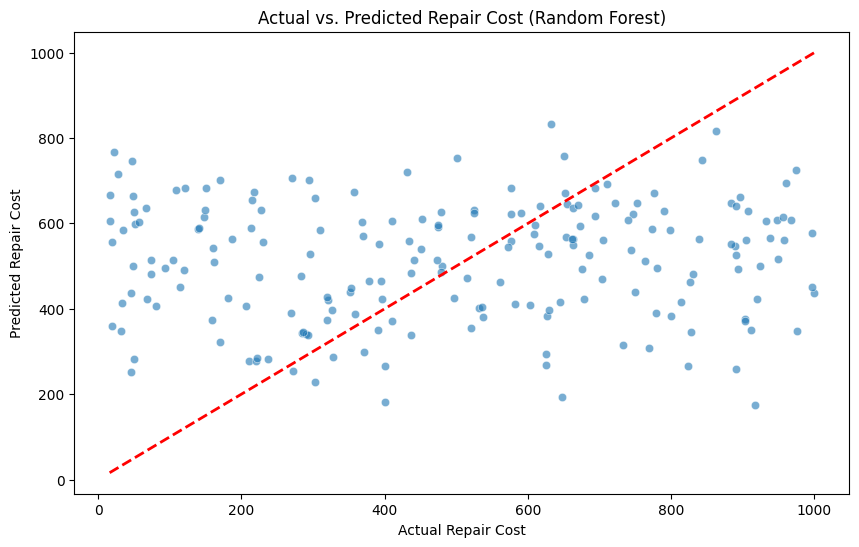

In [19]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

# Assuming you have already preprocessed your dataset and have X and y ready
# For demonstration purposes, let's use the earlier prepared dataset df_encoded

# Define the feature matrix (X) and target variable (y)
X = df_poly.drop(columns=['repair_cost'])
y = df_poly['repair_cost']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Linear Regression model
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)
y_lr_pred = lr_model.predict(X_test)

# Random Forest model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
y_rf_pred = rf_model.predict(X_test)

# Calculate Mean Squared Error for both models
mse_lr = mean_squared_error(y_test, y_lr_pred)
mse_rf = mean_squared_error(y_test, y_rf_pred)

print("Mean Squared Error (Linear Regression):", mse_lr)
print("Mean Squared Error (Random Forest):", mse_rf)

# Create DataFrames for comparison
comparison_lr_df = pd.DataFrame({'Actual': y_test, 'Predicted_LR': y_lr_pred})
comparison_rf_df = pd.DataFrame({'Actual': y_test, 'Predicted_RF': y_rf_pred})

# Print the first few rows of the DataFrames
print("\nLinear Regression Predictions:\n", comparison_lr_df.head())
print("\nRandom Forest Predictions:\n", comparison_rf_df.head())

# Plot Actual vs Predicted for Linear Regression
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_lr_pred, alpha=0.6, edgecolors='w', linewidth=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('Actual Repair Cost')
plt.ylabel('Predicted Repair Cost')
plt.title('Actual vs. Predicted Repair Cost (Linear Regression)')
plt.show()

# Plot Actual vs Predicted for Random Forest
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_rf_pred, alpha=0.6, edgecolors='w', linewidth=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('Actual Repair Cost')
plt.ylabel('Predicted Repair Cost')
plt.title('Actual vs. Predicted Repair Cost (Random Forest)')
plt.show()


In [20]:
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import cross_val_score

# Define models
models = {
    'Linear Regression': LinearRegression(),
    'Random Forest': RandomForestRegressor(),
    'Gradient Boosting': GradientBoostingRegressor()
}

# Train and evaluate models
results = {}
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    cv_scores = cross_val_score(model, X, y, cv=5, scoring='neg_mean_squared_error')
    results[name] = {
        'MSE': mse,
        'MAE': mae,
        'R²': r2,
        'CV Mean MSE': -cv_scores.mean()
    }

results


{'Linear Regression': {'MSE': 87860.91303350875,
  'MAE': 251.97870229444777,
  'R²': -0.025372959276328322,
  'CV Mean MSE': 89576.61539349686},
 'Random Forest': {'MSE': 97576.34668561319,
  'MAE': 253.72177815535713,
  'R²': -0.13875606230317516,
  'CV Mean MSE': 98668.16549662981},
 'Gradient Boosting': {'MSE': 92223.94981634017,
  'MAE': 257.84166288446943,
  'R²': -0.0762913914093648,
  'CV Mean MSE': 91935.74234050672}}

In [21]:
import pandas as pd
results_df = pd.DataFrame(results).T
results_df.sort_values(by='CV Mean MSE')


,MSE,MAE,R²,CV Mean MSE
Linear Regression,87860.913034,251.978702,-0.025373,89576.615393
Gradient Boosting,92223.949816,257.841663,-0.076291,91935.742341
Random Forest,97576.346686,253.721778,-0.138756,98668.165497


In [22]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [100, 200, 300],
    'max_features': ['auto', 'sqrt'],
    'max_depth': [10, 20, 30, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

rf = RandomForestRegressor()
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=3, n_jobs=-1, verbose=2)
grid_search.fit(X_train, y_train)

best_rf = grid_search.best_estimator_
y_pred = best_rf.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f'Best Random Forest - MSE: {mse}, MAE: {mae}, R²: {r2}')


Fitting 3 folds for each of 216 candidates, totalling 648 fits


C:\Python311\Lib\site-packages\sklearn\model_selection\_validation.py:425: FitFailedWarning: 
324 fits failed out of a total of 648.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
173 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Python311\Lib\site-packages\sklearn\model_selection\_validation.py", line 729, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Python311\Lib\site-packages\sklearn\base.py", line 1145, in wrapper
    estimator._validate_params()
  File "C:\Python311\Lib\site-packages\sklearn\base.py", line 638, in _validate_params
    validate_parameter_constraints(
  File "C:\Python311\Lib\site-packages\sklearn\utils\_param_validation.py", line 96, in validate

Best Random Forest - MSE: 87672.51781297982, MAE: 250.82446767529845, R²: -0.02317430963660061


In [23]:
from sklearn.svm import SVR

# Define SVR model
svr = SVR(kernel='rbf')

# Train and evaluate
svr.fit(X_train, y_train)
y_pred_svr = svr.predict(X_test)
mse_svr = mean_squared_error(y_test, y_pred_svr)
mae_svr = mean_absolute_error(y_test, y_pred_svr)
r2_svr = r2_score(y_test, y_pred_svr)
cv_scores_svr = cross_val_score(svr, X, y, cv=5, scoring='neg_mean_squared_error')

print(f'SVR - MSE: {mse_svr}, MAE: {mae_svr}, R²: {r2_svr}, CV Mean MSE: {-cv_scores_svr.mean()}')


SVR - MSE: 85868.88803200392, MAE: 254.89167187103064, R²: -0.0021252089374894645, CV Mean MSE: 84282.58167407295


In [25]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.preprocessing import StandardScaler

# Standardize the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Define neural network model
model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train_scaled.shape[1],)),
    Dense(64, activation='relu'),
    Dense(1)
])

model.compile(optimizer='adam', loss='mse')

# Train model
model.fit(X_train_scaled, y_train, epochs=50, batch_size=32, verbose=1)

# Evaluate model
y_pred_nn = model.predict(X_test_scaled).flatten()
mse_nn = mean_squared_error(y_test, y_pred_nn)
mae_nn = mean_absolute_error(y_test, y_pred_nn)
r2_nn = r2_score(y_test, y_pred_nn)

print(f'Neural Network - MSE: {mse_nn}, MAE: {mae_nn}, R²: {r2_nn}')





Epoch 1/50

25/25 [==============================] - 2s 4ms/step - loss: 343449.4375
Epoch 2/50
25/25 [==============================] - 0s 3ms/step - loss: 338604.5312
Epoch 3/50
25/25 [==============================] - 0s 3ms/step - loss: 329571.3750
Epoch 4/50
25/25 [==============================] - 0s 3ms/step - loss: 312089.4062
Epoch 5/50
25/25 [==============================] - 0s 3ms/step - loss: 282415.8750
Epoch 6/50
25/25 [==============================] - 0s 3ms/step - loss: 238912.1562
Epoch 7/50
25/25 [==============================] - 0s 3ms/step - loss: 188683.5156
Epoch 8/50
25/25 [==============================] - 0s 3ms/step - loss: 140239.6562
Epoch 9/50
25/25 [==============================] - 0s 3ms/step - loss: 106678.7734
Epoch 10/50
25/25 [==============================] - 0s 3ms/step - loss: 90520.2812
Epoch 11/50
25/25 [==============================] - 0s 3ms/step - loss: 85435.1328
Epoch 12/50
25/25 [==============================] - 0s 3ms/step - loss: